In [606]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
import plotly.graph_objs as go
import plotly.offline as py
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore", 'This pattern has match groups')

In [506]:
x=pd.read_csv('supply_chain.csv',encoding='latin1')

In [321]:
x.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_66308\1148594162.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(x.corr(),annot=True)


<AxesSubplot: >

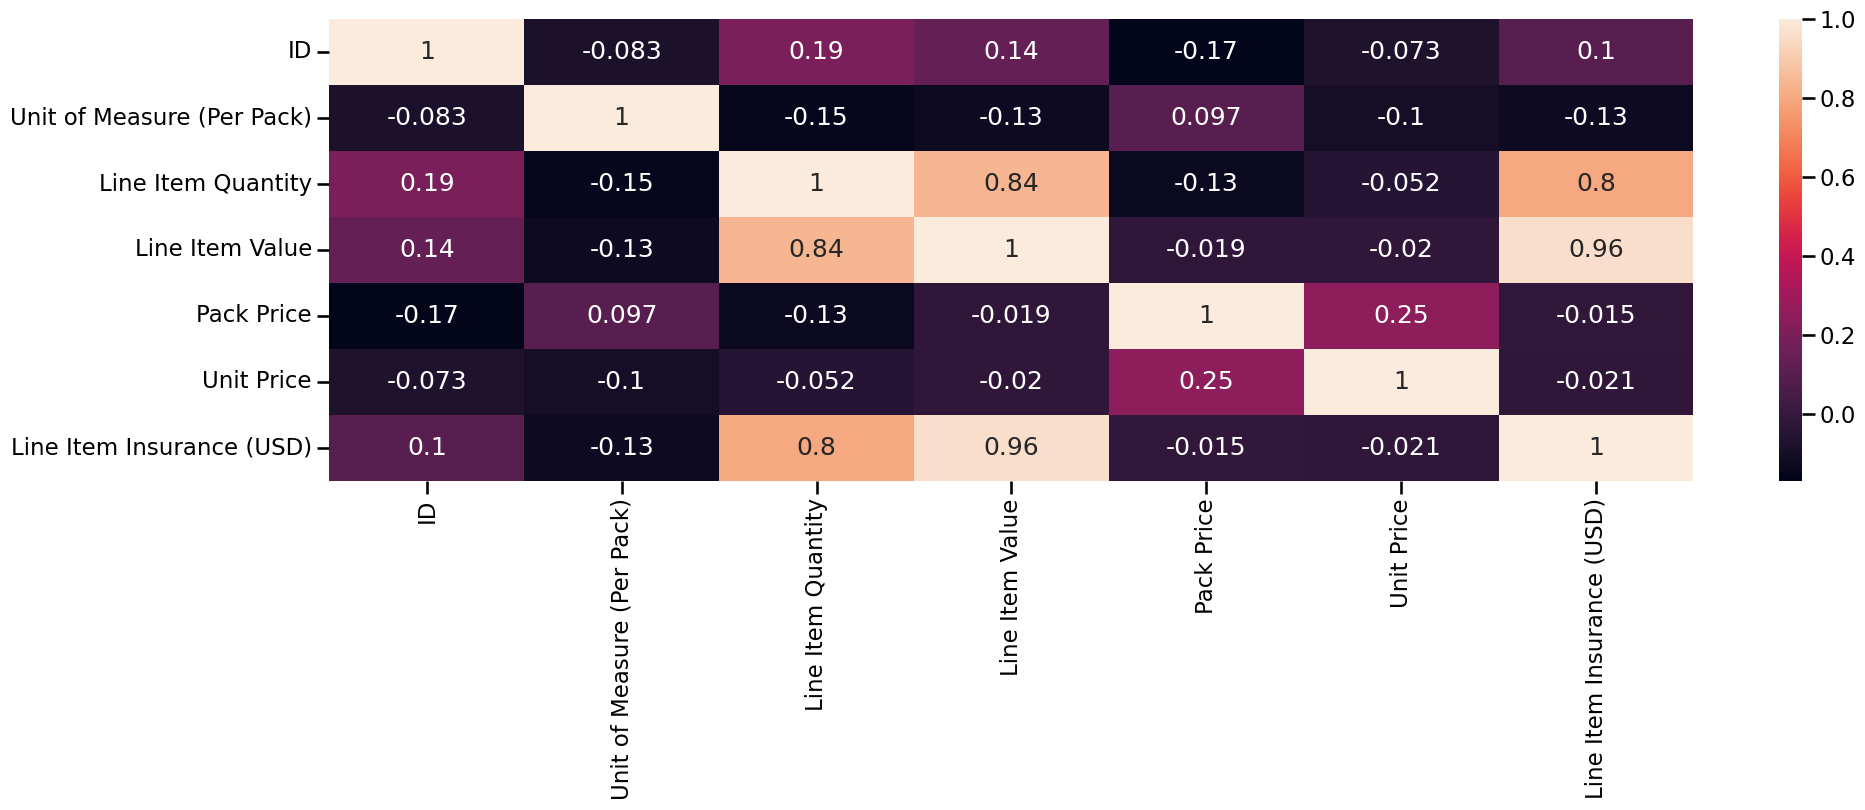

In [505]:
plt.figure(figsize=(22,6))
sns.heatmap(x.corr(),annot=True)

In [322]:
x.shape

(10324, 33)

In [448]:
x.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


In [441]:
x.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [442]:
(x.isnull().sum()/x.shape[0])*100

ID                               0.000000
Project Code                     0.000000
PQ #                             0.000000
PO / SO #                        0.000000
ASN/DN #                         0.000000
Country                          0.000000
Managed By                       0.000000
Fulfill Via                      0.000000
Vendor INCO Term                 0.000000
Shipment Mode                    3.487021
PQ First Sent to Client Date     0.000000
PO Sent to Vendor Date           0.000000
Scheduled Delivery Date          0.000000
Delivered to Client Date         0.000000
Delivery Recorded Date           0.000000
Product Group                    0.000000
Sub Classification               0.000000
Vendor                           0.000000
Item Description                 0.000000
Molecule/Test Type               0.000000
Brand                            0.000000
Dosage                          16.815188
Dosage Form                      0.000000
Unit of Measure (Per Pack)       0

#### Irrelevant columns(Might not be needed)



In [589]:
x=x.drop(columns=['PQ #','PO / SO #','ASN/DN #','Managed By','Fulfill Via','Vendor INCO Term','PQ First Sent to Client Date','Product Group','Vendor'])

##### Line Item Insaurance

In [509]:
#1
x['Line Item Insurance (USD)']=x['Line Item Insurance (USD)'].fillna(x['Line Item Insurance (USD)'].median())

In [510]:
#2
x=x[~(x['Line Item Insurance (USD)']>1000)]

In [511]:
#3
x['Line Item Insurance (USD)'].values[x['Line Item Insurance (USD)'].values>450]=x['Line Item Insurance (USD)'].mean()

In [512]:
#4
x['Line Item Insurance (USD)'].values[x['Line Item Insurance (USD)'].values>350]=x['Line Item Insurance (USD)'].mean()

In [513]:
x['Line Item Insurance (USD)']
x.shape

(9748, 33)

<AxesSubplot: ylabel='Line Item Insurance (USD)'>

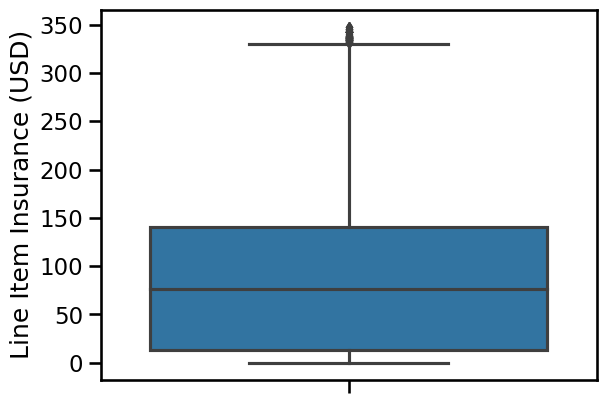

In [556]:
sns.boxplot(y=x['Line Item Insurance (USD)'])

In [594]:
x.head()

,Project Code,Country,Shipment Mode,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Sub Classification,Item Description,Molecule/Test Type,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
13,107-RW-T01,Rwanda,Air,12/22/2006,27-Feb-07,27-Feb-07,27-Feb-07,Adult,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,...,60,10000,99800.00,9.98,0.17,"Cipla, Goa, India",Yes,7416,64179.42,47.04
18,109-TZ-T01,Tanzania,Air,4/12/2007,6-Jun-07,6-Jun-07,6-Jun-07,Pediatric,"Didanosine 2g [Videx], powder for oral solutio...",Didanosine,...,200,712,8964.08,12.59,0.06,"BMS Meymac, France",Yes,162,912.96,47.04
19,102-NG-T01,Nigeria,Air,5/13/2007,19-Jun-07,19-Jun-07,19-Jun-07,HIV test,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",...,100,1000,80000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,341,2682.47,128.00
20,102-NG-T01,Nigeria,Air,5/17/2007,19-Jun-07,19-Jun-07,19-Jun-07,HIV test,"HIV 1/2, Stat-Pak HIV, Kit, 20 Tests","HIV 1/2, Stat-Pak HIV, Kit",...,20,7500,202500.00,27.00,1.35,Chembio Diagnostics Sys. Inc.,Yes,2278,15893.71,47.04
22,108-VN-T01,Vietnam,Air,7/4/2007,15-Oct-07,15-Oct-07,15-Oct-07,Pediatric,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,...,240,1000,1920.00,1.92,0.01,"Aurobindo Unit III, India",Yes,941,4193.49,3.07


##### Fregit cost US Dollar

In [514]:
x['Freight Cost (USD)'].values

array(['780.34', '4521.5', '1653.78', ..., 'See DN-4313 (ID#:83921)',
       'Freight Included in Commodity Cost',
       'Freight Included in Commodity Cost'], dtype=object)

In [515]:
x=x.loc[~x['Freight Cost (USD)'].str.contains('Freight Included in Commodity Cost')]

In [516]:
x=x.loc[~x['Freight Cost (USD)'].str.contains('Invoiced Separately')]

In [517]:
x=x.loc[~x['Freight Cost (USD)'].str.contains('See')]

In [479]:
x['Freight Cost (USD)'].values

array(['780.34', '4521.5', '1653.78', ..., '1653.9', '3785.72', '3410'],
      dtype=object)

In [480]:
x.shape

(5772, 32)

##### Shipment mode

In [388]:
x

,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,47.040000
1,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,47.040000
2,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,47.040000
3,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,47.040000
4,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,47.040000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10316,151-NG-T30,FPQ-16313,SO-51420,DN-4279,Nigeria,PMO - US,From RDC,N/A - From RDC,Air Charter,5/4/2015,...,60,15000,97800.00,6.52,0.11,"Aurobindo Unit III, India",Yes,1547,3410,115.110000
10318,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,10/16/2014,...,60,205243,738874.80,3.60,0.06,"Cipla, Goa, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),140.507526
10319,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,10/16/2014,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),140.507526
10320,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,10/24/2014,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.710000


In [344]:
x.isnull().sum()

Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    351
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1692
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
Unit Price                         0
M

In [518]:
x['Shipment Mode'].values

array(['Air', 'Air', 'Air', ..., 'Truck', 'Truck', 'Air Charter'],
      dtype=object)

In [519]:
x['Shipment Mode']=x['Shipment Mode'].fillna(x['Shipment Mode'].mode()[0])

In [520]:
x['Shipment Mode'].isnull().sum()

0

##### Dosage

In [484]:
x.isnull().sum()

Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                      0
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1334
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
Unit Price                         0
M

In [521]:
x['Dosage'].values

array([nan, '10mg/ml', nan, ..., '300/300mg', '30/50/60mg', '150/300mg'],
      dtype=object)

In [522]:
x['Dosage'].mode()

0    300mg
Name: Dosage, dtype: object

In [523]:
x['Dosage']=x['Dosage'].fillna(x['Dosage'].mode()[0])

In [524]:
x['Dosage'].isnull().sum()

0

##### Weight (Kilograms)

In [525]:
x['Weight (Kilograms)'].unique()

array(['13', '358', '171', ..., '3772', '1504', '1547'], dtype=object)

In [526]:
x=x.loc[~x['Weight (Kilograms)'].str.contains('Weight Captured Separately')]

In [527]:
x=x.loc[~x['Weight (Kilograms)'].str.contains('See')]


In [555]:
x.shape

(2762, 33)

##### PO Sent to Vendor Date


In [530]:
x['PO Sent to Vendor Date'].values

array(['Date Not Captured', 'Date Not Captured', 'Date Not Captured', ...,
       'N/A - From RDC', 'N/A - From RDC', 'N/A - From RDC'], dtype=object)

In [531]:
x['PO Sent to Vendor Date'].isnull().sum()

0

In [532]:
x.shape

(5749, 33)

In [533]:
x=x.loc[~x['PO Sent to Vendor Date'].str.contains('Date Not Captured')]

In [534]:
x=x.loc[~x['PO Sent to Vendor Date'].str.contains('N/A - From RDC')]

# Data Visualization

Total Pack Price for Top 15 Countries

Country
Nigeria          11949.89
Haiti             9664.05
Côte d'Ivoire     9302.48
Vietnam           9201.47
Uganda            9022.49
Tanzania          5952.13
Mozambique        5369.21
Zambia            5268.19
Botswana          5004.50
Rwanda            4414.87
Guyana            3699.85
Kenya             3207.44
Cameroon          2990.29
Zimbabwe          2927.43
Namibia           2696.80
Name: Pack Price, dtype: float64


Text(0.5, 0, 'Country Name')

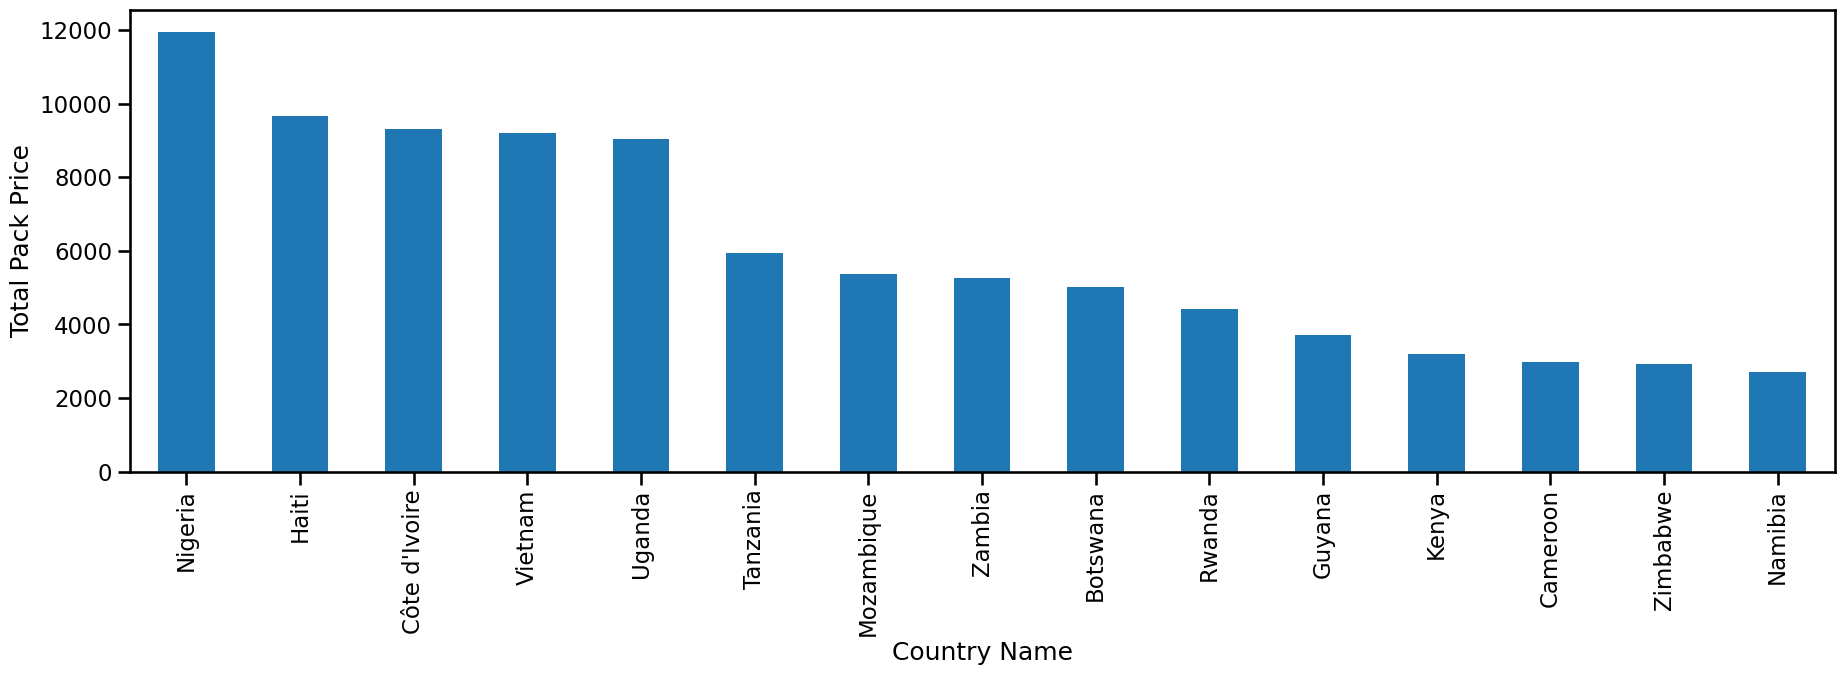

In [607]:
#Total Pack Price for Top 15 Countries with graph
TotalPrice = x.groupby(['Country'])['Pack Price'].sum().nlargest(15)
print("Total Pack Price for Top 15 Countries\n")
print(TotalPrice)
plt.figure(figsize=(22,6))
GraphData=x.groupby(['Country'])['Pack Price'].sum().nlargest(15)
GraphData.plot(kind='bar')
plt.ylabel('Total Pack Price')
plt.xlabel('Country Name')

Text(0.5, 0, 'First Line Designation')

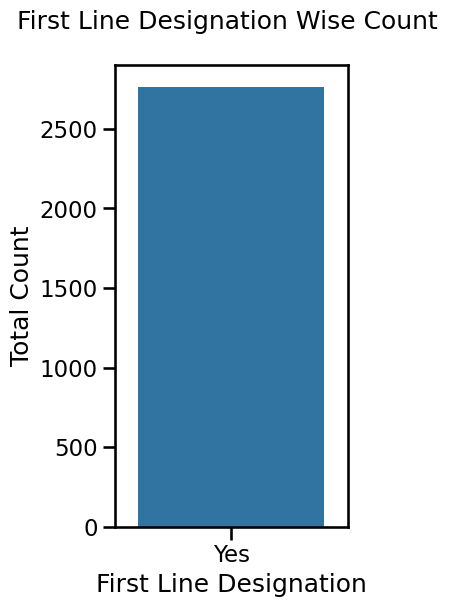

In [554]:
# First Line Designation Count
plt.figure(figsize=(3,6))
sns.countplot(x=x['First Line Designation'])
plt.title('First Line Designation Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('First Line Designation')

In [573]:
# Pie Chart of column Shipment Mode
ShippingMode = x["Shipment Mode"].value_counts()
labels = (np.array(ShippingMode.index))
sizes = (np.array((ShippingMode / ShippingMode.sum())*100))
trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="Shipment Mode")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="Shipment Mode")

Manufacturing Site
Aurobindo Unit III, India         433
Alere Medical Co., Ltd.           341
Trinity Biotech, Plc              259
Inverness Japan                   212
Mylan (formerly Matrix) Nashik    211
ABBVIE Ludwigshafen Germany       189
Hetero Unit III Hyderabad IN      154
Cipla, Goa, India                 111
ABBVIE (Abbott) Logis. UK         110
Chembio Diagnostics Sys. Inc.     110
dtype: int64


Text(0.5, 0, 'Manufacturing Site')

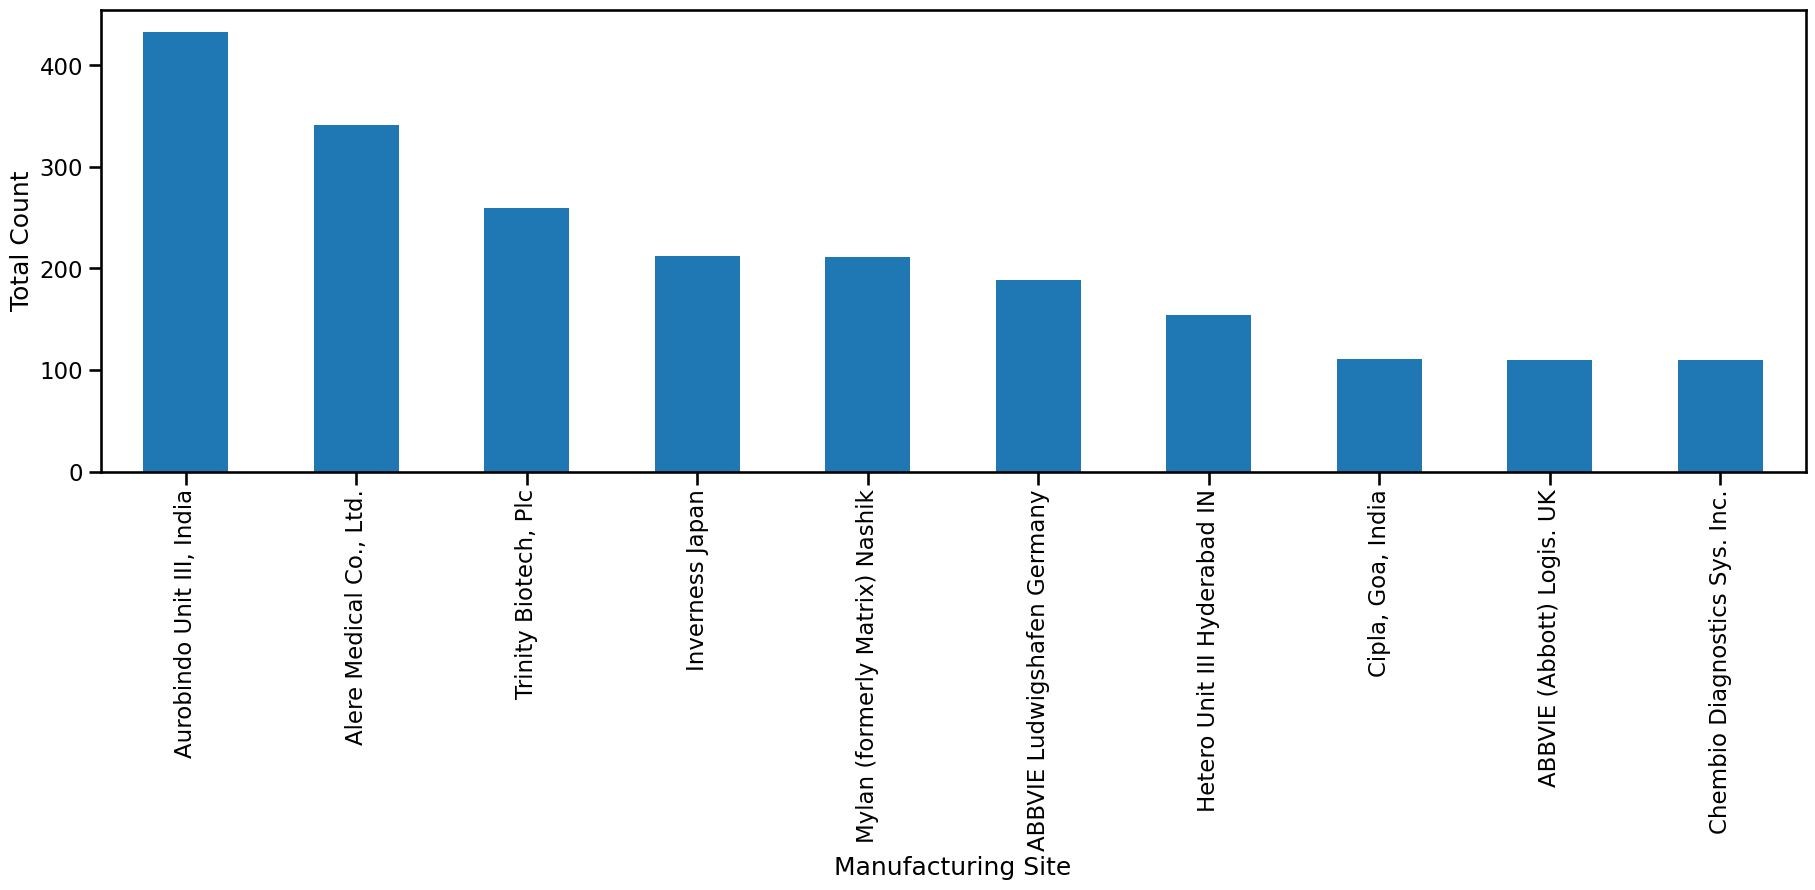

In [575]:
# Count of Manufacturing Site name
plt.figure(figsize=(22,6))
print(TopFiveManufacturingSite)
TopFiveManufacturingSite.plot(kind='bar')
plt.ylabel('Total Count')
plt.xlabel('Manufacturing Site')

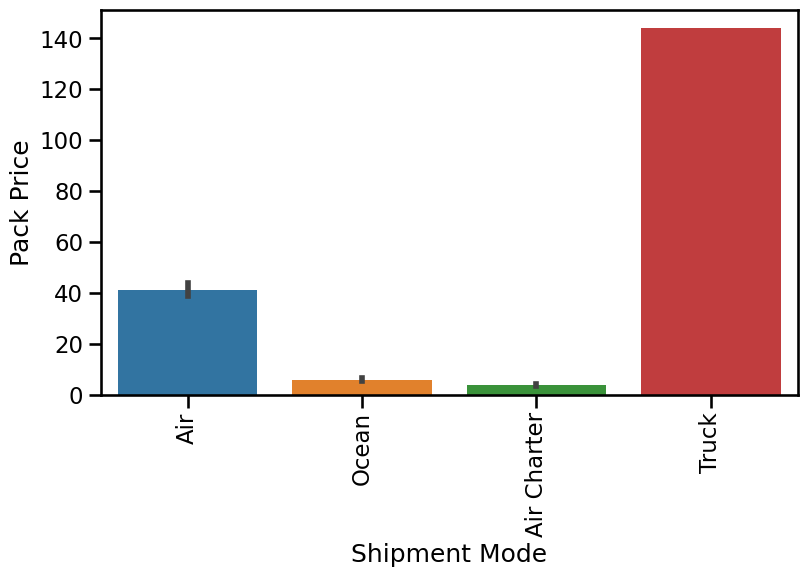

In [578]:
#Shipment mode vs PackPrice
plt.figure(figsize = (9,5))
plt.xticks(rotation = 90)
sns.barplot(x='Shipment Mode',y='Pack Price', data = x)
plt.show()

Text(0, 0.5, 'Country')

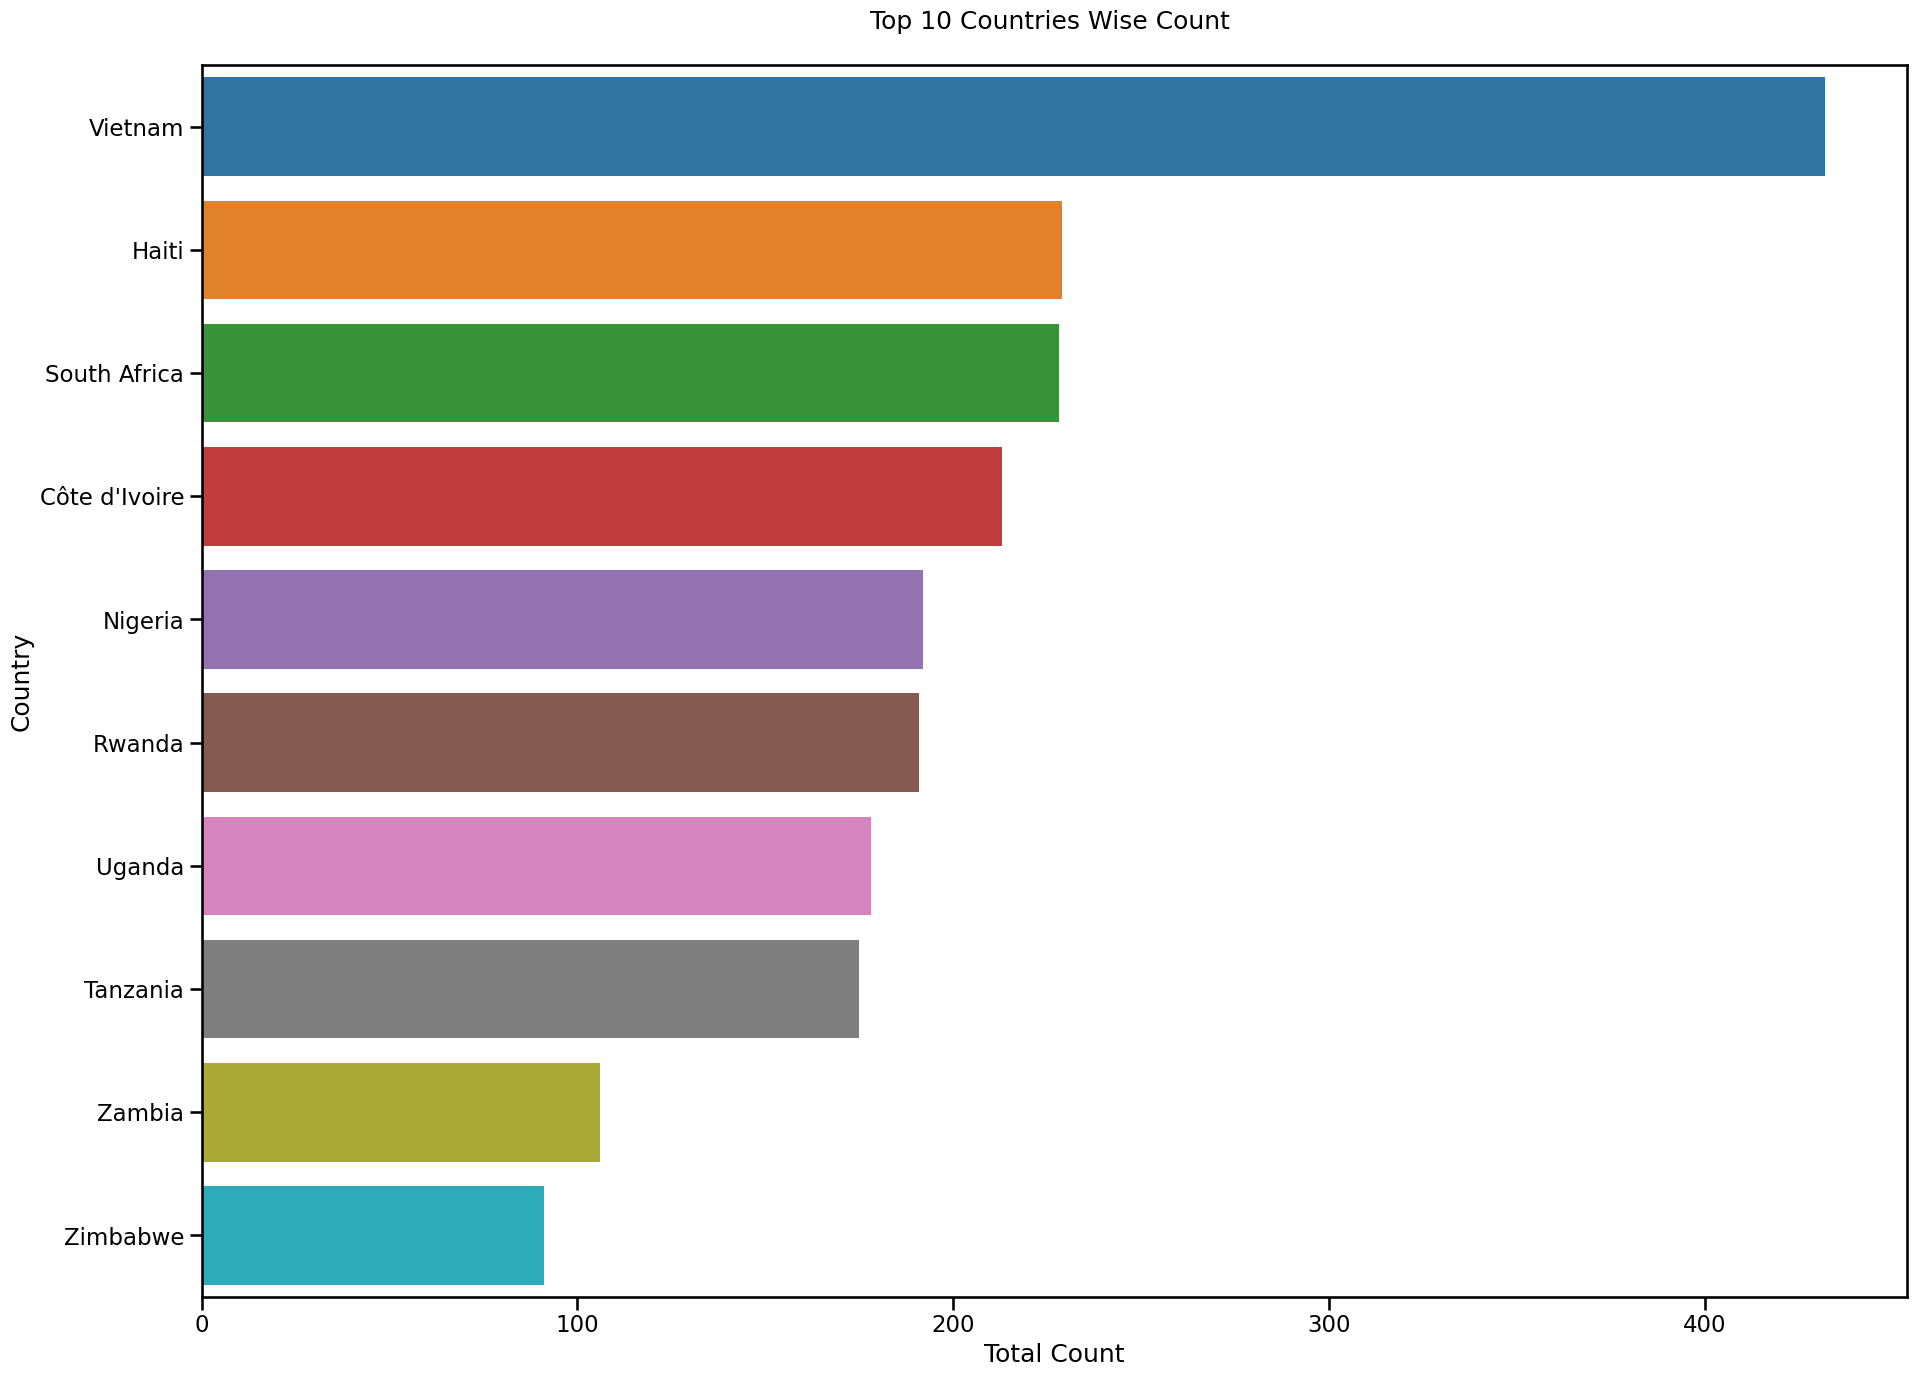

In [558]:
# Country Wise Count
ItemCount = x["Country"].value_counts().nlargest(10)
sns.set_context("talk",font_scale=1)
plt.figure(figsize=(22,16))
sns.countplot(y=x['Country'],order = x['Country'].value_counts().nlargest(10).index)
plt.title('Top 10 Countries Wise Count \n')
plt.xlabel('Total Count')
plt.ylabel('Country')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_66308\1782566840.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

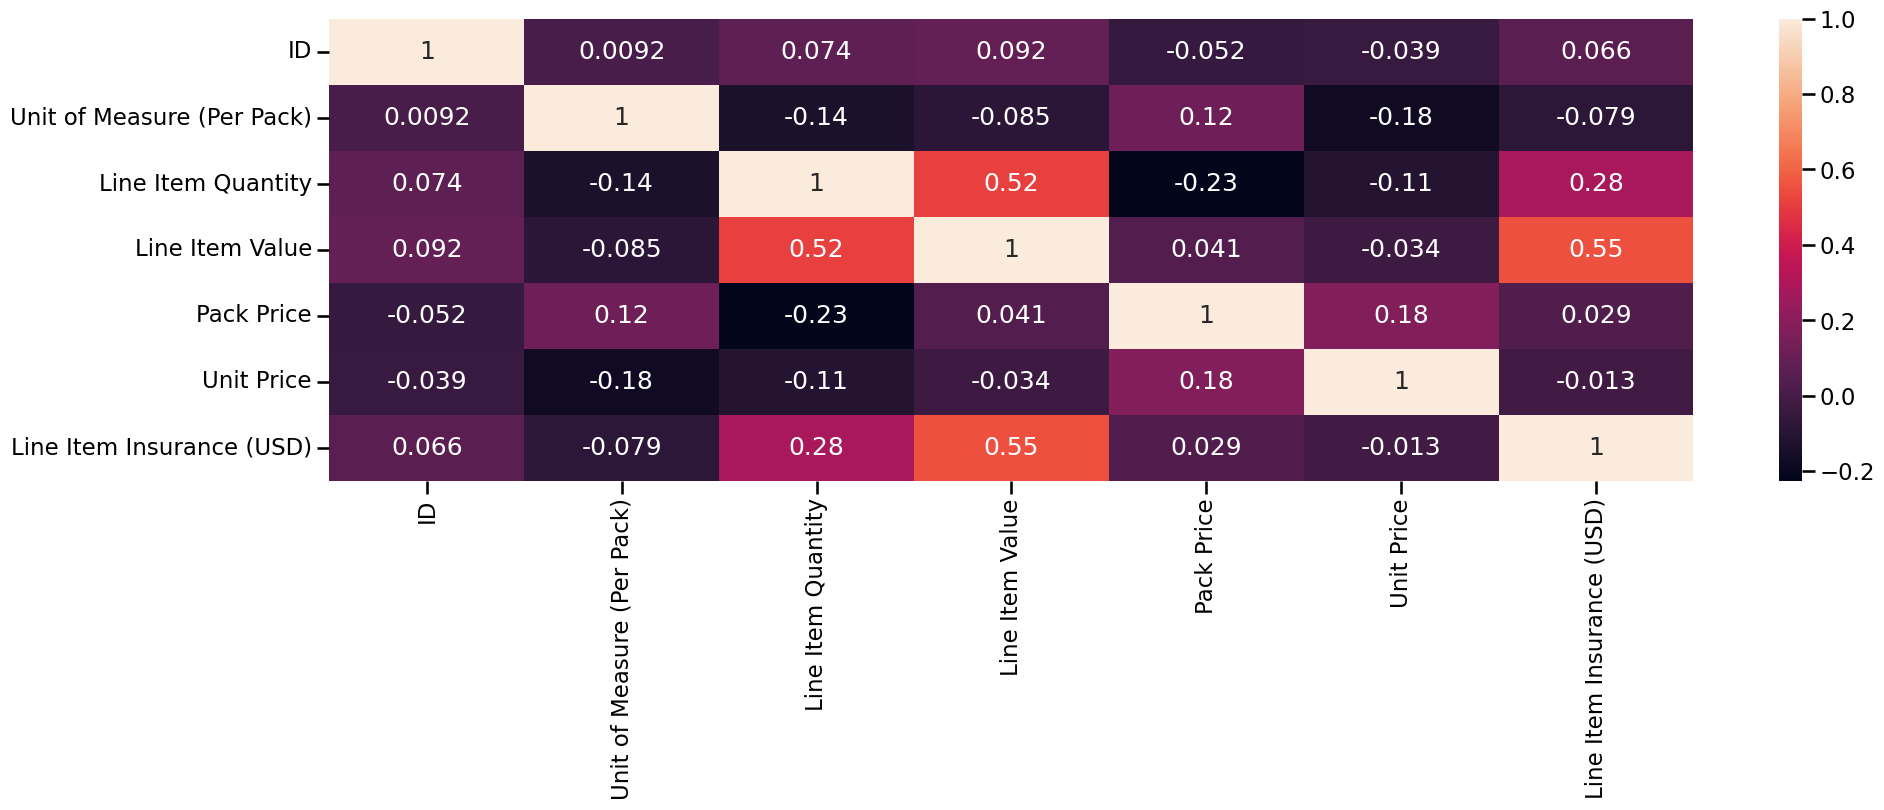

In [580]:
#Heatmap
plt.figure(figsize=(22,6))
sns.heatmap(x.corr(),annot=True)

#### Insights
* From the heatmap we can observe that the columns present are not correlated to each other to that extent, hence they can be used while training.
* From the pie chart we can observe that most used shipment mode is air(91.6%) followed by ocean(7.75%),Followed by Air   Charter(0.615%),followed by Truck(0.0362%).
* From the count plot of 'First Line Designation' column we can observe that 'Yes' is only present. 
* From the barplot of the 'Shipment Mode' vs 'Pack Price' ,we can observe that people send their goods in large proportion     through trucks.
* from the count plot of 'total count vs country' we can observe that vietnam has exported large number of drugs.
* from the bar plot of 'Manufacturing Site' vs 'Total Count' we can observe that top two manufacturing sites are in India 

## Data Preprocessing


In [596]:
le=LabelEncoder()
x['Shipment Mode']=le.fit_transform(x['Shipment Mode'])
# air=0

In [604]:
x['Sub Classification']=le.fit_transform(x['Sub Classification'])

In [605]:
x

,Project Code,Country,Shipment Mode,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Sub Classification,Item Description,Molecule/Test Type,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
13,107-RW-T01,Rwanda,0,12/22/2006,27-Feb-07,27-Feb-07,27-Feb-07,1,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,...,60,10000,99800.00,9.98,0.17,"Cipla, Goa, India",Yes,7416,64179.42,47.040000
18,109-TZ-T01,Tanzania,0,4/12/2007,6-Jun-07,6-Jun-07,6-Jun-07,5,"Didanosine 2g [Videx], powder for oral solutio...",Didanosine,...,200,712,8964.08,12.59,0.06,"BMS Meymac, France",Yes,162,912.96,47.040000
19,102-NG-T01,Nigeria,0,5/13/2007,19-Jun-07,19-Jun-07,19-Jun-07,2,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",...,100,1000,80000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,341,2682.47,128.000000
20,102-NG-T01,Nigeria,0,5/17/2007,19-Jun-07,19-Jun-07,19-Jun-07,2,"HIV 1/2, Stat-Pak HIV, Kit, 20 Tests","HIV 1/2, Stat-Pak HIV, Kit",...,20,7500,202500.00,27.00,1.35,Chembio Diagnostics Sys. Inc.,Yes,2278,15893.71,47.040000
22,108-VN-T01,Vietnam,0,7/4/2007,15-Oct-07,15-Oct-07,15-Oct-07,5,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,...,240,1000,1920.00,1.92,0.01,"Aurobindo Unit III, India",Yes,941,4193.49,3.070000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6563,161-ZA-T30,South Africa,2,6/17/2010,4-Mar-11,4-Mar-11,4-Mar-11,1,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,...,60,130828,316603.76,2.42,0.04,"Aurobindo Unit III, India",Yes,6525,10984.82,140.507526
6566,161-ZA-T30,South Africa,2,6/17/2010,20-Dec-10,12-Jan-11,12-Jan-11,1,"Tenofovir Disoproxil Fumarate 300mg, tablets, ...",Tenofovir Disoproxil Fumarate,...,30,11711,80923.01,6.91,0.23,"Aurobindo Unit III, India",Yes,1093,5460.48,174.470000
6570,108-VN-T30,Vietnam,0,7/12/2012,8-Oct-12,8-Oct-12,8-Oct-12,1,"Nevirapine 200mg, tablets, 60 Tabs",Nevirapine,...,60,8586,20005.38,2.33,0.04,Hetero Unit III Hyderabad IN,Yes,544,1454.64,28.050000
6573,161-ZA-T30,South Africa,0,3/19/2010,7-Sep-10,17-Nov-10,17-Nov-10,1,"Efavirenz 600mg, tablets, 30 Tabs",Efavirenz,...,30,39049,182358.83,4.67,0.16,"Aurobindo Unit III, India",Yes,3669,4263.07,88.073525
